# Imports

In [94]:
import numpy as np
import matplotlib.pyplot as plt
import cirq as cq
import stim
import pymatching as pm
import stimcirq as sc
import pickle
from datetime import date

from src.noisify import noisify
from src.circuit_generation import generate_split_circuit
from src.cirq_glue import *


In [93]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Stim Infra

Loading noise model from Ottema benchmarking data

In [3]:
with open("noise_model.pkl", "rb") as f:
    noise_model = pickle.load(f)

In [ ]:
stim_circuit, mtrack = generate_split_circuit(initialize='z',
                                 readout='zz',
                                 full_idles=3,
                                 split_idles=2,
                                 rotate=True,
                                 init_detectors=True,
                                 x_detectors='all',
                                 z_detectors='all',
                                 arb_init=False)
converter = stim_circuit.compile_m2d_converter()

# Add noise
noisy_circuit = noisify(stim_circuit, noise_model=noise_model, 
                        pipelined=True, virtual_z=True,
                        average=False)

# Typical fancy objects that go with a stim circuit
dem = noisy_circuit.detector_error_model(decompose_errors=True)
# det_sampler =  noisy_circuit.compile_detector_sampler()
mmt_sampler = noisy_circuit.compile_sampler()
match = pm.Matching(dem)

# Here is a graph to play with 
dem.diagram("match-graph-3d")

{"accessors":[{"bufferView":0,"byteOffset":0,"componentType":5126,"count":9,"max":[0,0.400000005960464,0.400000005960464],"min":[0,-0.400000005960464,-0.400000005960464],"name":"circle_loop","type":"VEC3"},{"bufferView":1,"byteOffset":0,"componentType":5126,"count":9,"max":[0.400000005960464,0,0.400000005960464],"min":[-0.400000005960464,0,-0.400000005960464],"name":"circle_loop","type":"VEC3"},{"bufferView":2,"byteOffset":0,"componentType":5126,"count":9,"max":[0.400000005960464,0.400000005960464,0],"min":[-0.400000005960464,-0.400000005960464,0],"name":"circle_loop","type":"VEC3"},{"bufferView":3,"byteOffset":0,"componentType":5126,"count":9,"max":[0,0.400000005960464,0.400000005960464],"min":[0,-0.400000005960464,-0.400000005960464],"name":"circle_loop","type":"VEC3"},{"bufferView":4,"byteOffset":0,"componentType":5126,"count":9,"max":[0.400000005960464,0,0.400000005960464],"min":[-0.400000005960464,0,-0.400000005960464],"name":"circle_loop","type":"VEC3"},{"bufferView":5,"byteOffset":0,"componentType":5126,"count":9,"max":[0.400000005960464,0.400000005960464,0],"min":[-0.400000005960464,-0.400000005960464,0],"name":"circle_loop","type":"VEC3"},{"bufferView":6,"byteOffset":0,"componentType":5126,"count":1646,"max":[28.9532718658447,27.4208183288574,39.6756896972656],"min":[-7.13416624069214,-9.50910377502441,-9.67568874359131],"name":"buf_scattered_lines","type":"VEC3"},{"bufferView":7,"byteOffset":0,"componentType":5126,"count":230,"max":[19.9079856872559,12.5208339691162,30],"min":[0.187573909759521,6.33333349227905,-9.99635601043701],"name":"buf_red_scattered_lines","type":"VEC3"}],"asset":{"version":"2.0"},"bufferViews":[{"buffer":0,"byteLength":108,"byteOffset":0,"name":"circle_loop","target":34962},{"buffer":1,"byteLength":108,"byteOffset":0,"name":"circle_loop","target":34962},{"buffer":2,"byteLength":108,"byteOffset":0,"name":"circle_loop","target":34962},{"buffer":3,"byteLength":108,"byteOffset":0,"name":"circle_loop","target":34962},{"buffer":4,"byteLength":108,"byteOffset":0,"name":"circle_loop","target":34962},{"buffer":5,"byteLength":108,"byteOffset":0,"name":"circle_loop","target":34962},{"buffer":6,"byteLength":19752,"byteOffset":0,"name":"buf_scattered_lines","target":34962},{"buffer":7,"byteLength":2760,"byteOffset":0,"name":"buf_red_scattered_lines","target":34962}],"buffers":[{"byteLength":108,"name":"circle_loop","uri":"data:application/octet-stream;base64,AAAAAM3MzD4AAAAAAAAAAMPQkD7D0JA+AAAAAPIwlrLNzMw+AAAAAMPQkL7D0JA+AAAAAM3MzL7yMBazAAAAAMHQkL7E0JC+AAAAAPLkozHNzMy+AAAAAMbQkD6/0JC+AAAAAM3MzD4AAAAA"},{"byteLength":108,"name":"circle_loop","uri":"data:application/octet-stream;base64,AAAAAAAAAADNzMw+w9CQPgAAAADD0JA+zczMPgAAAADyMJayw9CQPgAAAADD0JC+8jAWswAAAADNzMy+xNCQvgAAAADB0JC+zczMvgAAAADy5KMxv9CQvgAAAADG0JA+AAAAAAAAAADNzMw+"},{"byteLength":108,"name":"circle_loop","uri":"data:application/octet-stream;base64,zczMPgAAAAAAAAAAw9CQPsPQkD4AAAAA8jCWss3MzD4AAAAAw9CQvsPQkD4AAAAAzczMvvIwFrMAAAAAwdCQvsTQkL4AAAAA8uSjMc3MzL4AAAAAxtCQPr/QkL4AAAAAzczMPgAAAAAAAAAA"},{"byteLength":108,"name":"circle_loop","uri":"data:application/octet-stream;base64,AAAAAM3MzD4AAAAAAAAAAMPQkD7D0JA+AAAAAPIwlrLNzMw+AAAAAMPQkL7D0JA+AAAAAM3MzL7yMBazAAAAAMHQkL7E0JC+AAAAAPLkozHNzMy+AAAAAMbQkD6/0JC+AAAAAM3MzD4AAAAA"},{"byteLength":108,"name":"circle_loop","uri":"data:application/octet-stream;base64,AAAAAAAAAADNzMw+w9CQPgAAAADD0JA+zczMPgAAAADyMJayw9CQPgAAAADD0JC+8jAWswAAAADNzMy+xNCQvgAAAADB0JC+zczMvgAAAADy5KMxv9CQvgAAAADG0JA+AAAAAAAAAADNzMw+"},{"byteLength":108,"name":"circle_loop","uri":"data:application/octet-stream;base64,zczMPgAAAAAAAAAAw9CQPsPQkD4AAAAA8jCWss3MzD4AAAAAw9CQvsPQkD4AAAAAzczMvvIwFrMAAAAAwdCQvsTQkL4AAAAA8uSjMc3MzL4AAAAAxtCQPr/QkL4AAAAAzczMPgAAAAAAAAAA"},{"byteLength":19752,"name":"buf_scattered_lines","uri":"data:application/octet-stream;base64,OY6DQFZVVUAAAAAAwNrYPsAgqb1LUQrBHMchQVZVVUAAAAAAjNMdQfhOrr5PwhTBjuOAQVZVVUAAAAAAsyKbQfB4Db5hkQzBOY6DQFZVdUEAAAAAaFHePtmVlkHU6gnBHMchQVZVdUEAAAAA7tYdQeitmEHuQhTBjuOAQVZVdUEAAAAAnw6bQXEJl0Ha

## Converting to cirq infra

In [ ]:
cirq_circuit = convert_to_cirq(stim_circuit, noise_model=noise_model)

Run the simulation

In [16]:
shots = 10000

simulator = cq.Simulator()

results = simulator.run(cirq_circuit, repetitions=shots)
mmts = results.data.to_numpy(dtype=np.bool_)
dets, log_ops = converter.convert(measurements=results.data.to_numpy(dtype=np.bool_), 
                            separate_observables=True)


Or just load previous results

In [33]:
# today = date.today().strftime('%Y%m%d')

# import pickle
# with open(f"{today}_z_zz_10000_results.pkl", 'wb') as f:
#     pickle.dump(results, f)

with open("20250331_z_zz_10000_results.pkl", 'rb') as f:
    results = pickle.load(f)
mmts = results.data.to_numpy(dtype=np.bool_)
dets, log_ops = converter.convert(measurements=results.data.to_numpy(dtype=np.bool_), 
                            separate_observables=True)

In [34]:
get_operator_values(mmts, dets, match, mtrack)

{'raw': -0.2208,
 'decoded': -0.5858,
 'post_selected': -1.0,
 'shots_raw': 10000,
 'shots_decoded': 10000,
 'shots_ps': 232}

## Comparing to stim simulation

In [32]:
stim_mmts = mmt_sampler.sample(10000)
stim_dets, stim_log_ops = converter.convert(measurements=stim_mmts, 
                            separate_observables=True)


get_operator_values(stim_mmts, stim_dets, match, mtrack)

{'raw': -0.222,
 'decoded': -0.6294,
 'post_selected': -1.0,
 'shots_raw': 10000,
 'shots_decoded': 10000,
 'shots_ps': 251}

# Figure 3

## Verifying stim setup works

Lets do that by recreating figure 3

In [109]:
today = date.today().strftime('%Y%m%d')

## Stim Simulation

In [101]:
factors = [1]
shots = 10000
ros = ['zz', 'xx', 'yy']

stim_data = {ro: {factor: {}
            for factor in factors} for ro in ros}

for readout in ['zz', 'xx', 'yy']:
    for factor in factors:
        stim_data[readout][factor] = get_expectation(shots=shots, readout=readout,
                                    noise_model=noise_model, factor=factor,
                                    simulation='stim', arb_init=False)
        print('.', end='')
    print(readout, end='')
print('!')

.zz.xx.yy!


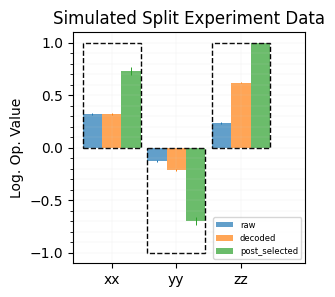

In [ ]:
# organizing data
groups = ['xx', 'yy', 'zz']
raw_data = np.asarray([stim_data[group][1]['raw'] for group in groups])
decoded_data = np.asarray([stim_data[group][1]['decoded'] for group in groups])
post_selected_data = np.asarray([stim_data[group][1]['post_selected'] for group in groups])
shots_raw = np.asarray([stim_data[group][1]['shots_raw'] for group in groups])
shots_decoded = np.asarray([stim_data[group][1]['shots_decoded'] for group in groups])
shots_ps = np.asarray([stim_data[group][1]['shots_ps'] for group in groups])

xs = np.array(range(3))

plt.figure(figsize=(3,3))
bar_width = .3

# Raw
plt.bar(xs - bar_width, raw_data, bar_width, label='raw', alpha=.7)
plt.errorbar(xs - bar_width, raw_data, yerr=np.sqrt(((1+raw_data)*(1-raw_data))/shots_raw), 
             linestyle=' ', linewidth=.7)
# Decoded
plt.bar(xs + 0., decoded_data, bar_width, label='decoded', alpha=.7)
plt.errorbar(xs - 0, decoded_data, yerr=np.sqrt(((1+decoded_data)*(1-decoded_data))/shots_decoded), 
             linestyle=' ', linewidth=.7)
# Post-selected
plt.bar(xs + bar_width, post_selected_data, bar_width, label='post_selected', alpha=.7)
plt.errorbar(xs + bar_width, post_selected_data, yerr=np.sqrt(((1+post_selected_data)*(1-post_selected_data))/shots_ps), 
             linestyle=' ', linewidth=.7)
# Outlines
plt.bar(xs, [1, -1, 1], 3*bar_width, alpha=1, 
        color='none', edgecolor='black', linestyle='dashed')

# Nicities
plt.xticks(xs, groups)
plt.ylabel('Log. Op. Value')
plt.legend(fontsize=6)
plt.grid(which='both', color='lightgray', linewidth=.1)
plt.yticks(ticks=np.linspace(-1, 1, 5))
plt.yticks(ticks=np.linspace(-1, 1, 21), minor=True)
plt.xlim(-.6, 3)
plt.title('Simulated Split Experiment Data')
# plt.savefig(f'figs/{today}_stim_fig3_{shots}.png')
plt.show()

## Cirq Simulation

In [103]:
factors = [1]
shots = 1000
ros = ['zz', 'xx', 'yy']

cirq_data = {ro: {factor: {}
            for factor in factors} for ro in ros}

for readout in ['zz', 'xx', 'yy']:
    for factor in factors:
        cirq_data[readout][factor] = get_expectation(shots=shots, readout=readout,
                                    noise_model=noise_model, factor=factor,
                                    simulation='cirq', arb_init=False)
        print('.', end='')
    print(readout, end='')
print('!')

.zz.xx.yy!


In [104]:
today = date.today().strftime('%Y%m%d')
with open(f"simulation_data/{today}_z_all_{shots}_cirq_noarb.pkl", 'wb') as f:
    pickle.dump(cirq_data, f)

In [107]:
cirq_data

{'zz': {1: {'raw': 0.276,
   'decoded': 0.63,
   'post_selected': 1.0,
   'shots_raw': 1000,
   'shots_decoded': 1000,
   'shots_ps': 53}},
 'xx': {1: {'raw': 0.294,
   'decoded': 0.294,
   'post_selected': 0.5882352941176471,
   'shots_raw': 1000,
   'shots_decoded': 1000,
   'shots_ps': 34}},
 'yy': {1: {'raw': -0.174,
   'decoded': -0.226,
   'post_selected': -0.673469387755102,
   'shots_raw': 1000,
   'shots_decoded': 1000,
   'shots_ps': 49}}}

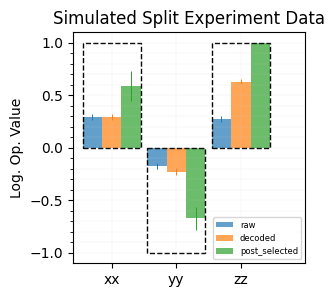

In [108]:
# organizing data
groups = ['xx', 'yy', 'zz']
raw_data = np.asarray([cirq_data[group][1]['raw'] for group in groups])
decoded_data = np.asarray([cirq_data[group][1]['decoded'] for group in groups])
post_selected_data = np.asarray([cirq_data[group][1]['post_selected'] for group in groups])
shots_raw = np.asarray([cirq_data[group][1]['shots_raw'] for group in groups])
shots_decoded = np.asarray([cirq_data[group][1]['shots_decoded'] for group in groups])
shots_ps = np.asarray([cirq_data[group][1]['shots_ps'] for group in groups])

xs = np.array(range(3))

plt.figure(figsize=(3,3))
bar_width = .3

# Raw
plt.bar(xs - bar_width, raw_data, bar_width, label='raw', alpha=.7)
plt.errorbar(xs - bar_width, raw_data, yerr=np.sqrt(((1+raw_data)*(1-raw_data))/shots_raw), 
             linestyle=' ', linewidth=.7)
# Decoded
plt.bar(xs + 0., decoded_data, bar_width, label='decoded', alpha=.7)
plt.errorbar(xs - 0, decoded_data, yerr=np.sqrt(((1+decoded_data)*(1-decoded_data))/shots_decoded), 
             linestyle=' ', linewidth=.7)
# Post-selected
plt.bar(xs + bar_width, post_selected_data, bar_width, label='post_selected', alpha=.7)
plt.errorbar(xs + bar_width, post_selected_data, yerr=np.sqrt(((1+post_selected_data)*(1-post_selected_data))/shots_ps), 
             linestyle=' ', linewidth=.7)
# Outlines
plt.bar(xs, [1, -1, 1], 3*bar_width, alpha=1, 
        color='none', edgecolor='black', linestyle='dashed')

# Nicities
plt.xticks(xs, groups)
plt.ylabel('Log. Op. Value')
plt.legend(fontsize=6)
plt.grid(which='both', color='lightgray', linewidth=.1)
plt.yticks(ticks=np.linspace(-1, 1, 5))
plt.yticks(ticks=np.linspace(-1, 1, 21), minor=True)
plt.xlim(-.6, 3)
plt.title('Simulated Split Experiment Data')
plt.savefig(f'figs/{today}_cirq_fig3_{shots}.png')
plt.show()